In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
# Get the Data
# Read in the advertising.csv file and set it to data frame called ad_data

ad_data = pd.read_csv('advertising.csv')

In [4]:
# Chech the head of the ad_data

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<Axes: xlabel='Age', ylabel='Count'>

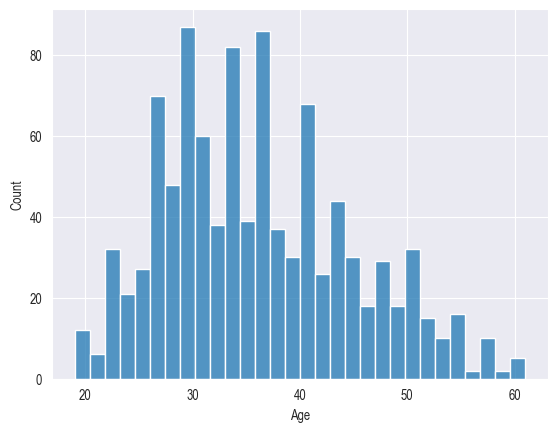

In [6]:
# Exploratory Data Analysis
# Create a histogram of the Age using seaborn 

sns.histplot(data=ad_data, x='Age', bins=30)

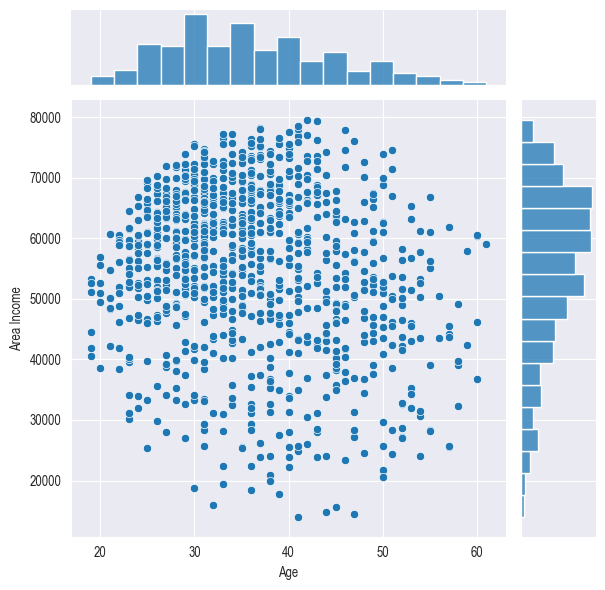

In [9]:
# Create a joinplot showing Area versus Age

sns.jointplot(data=ad_data, x='Age', y='Area Income')

In [10]:
# Use info and describe on ad_data

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [11]:
# describe()

ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


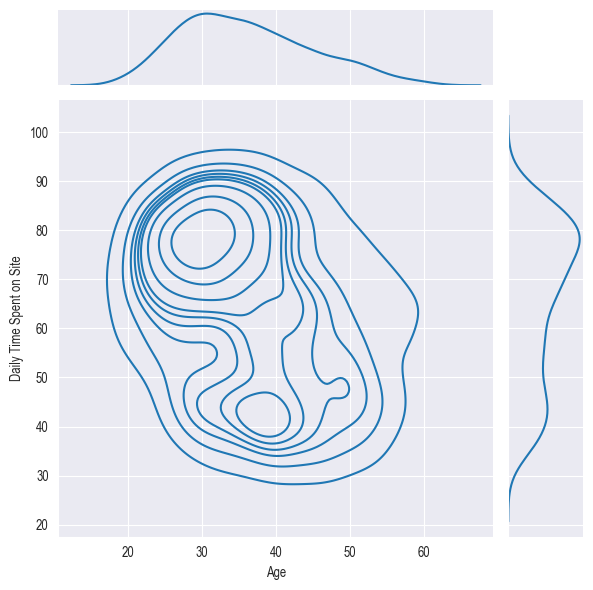

In [24]:
# Create a jointplot showing the kde distributions of Daily Time spent on site vs Age

sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', palette='magma')

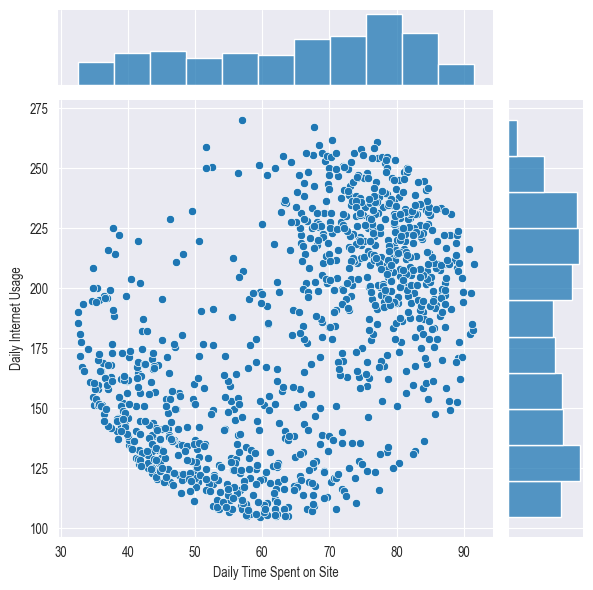

In [26]:
# Create a joinplot on Daily Time Spent on Site vs Daily Internet Usage

sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage')

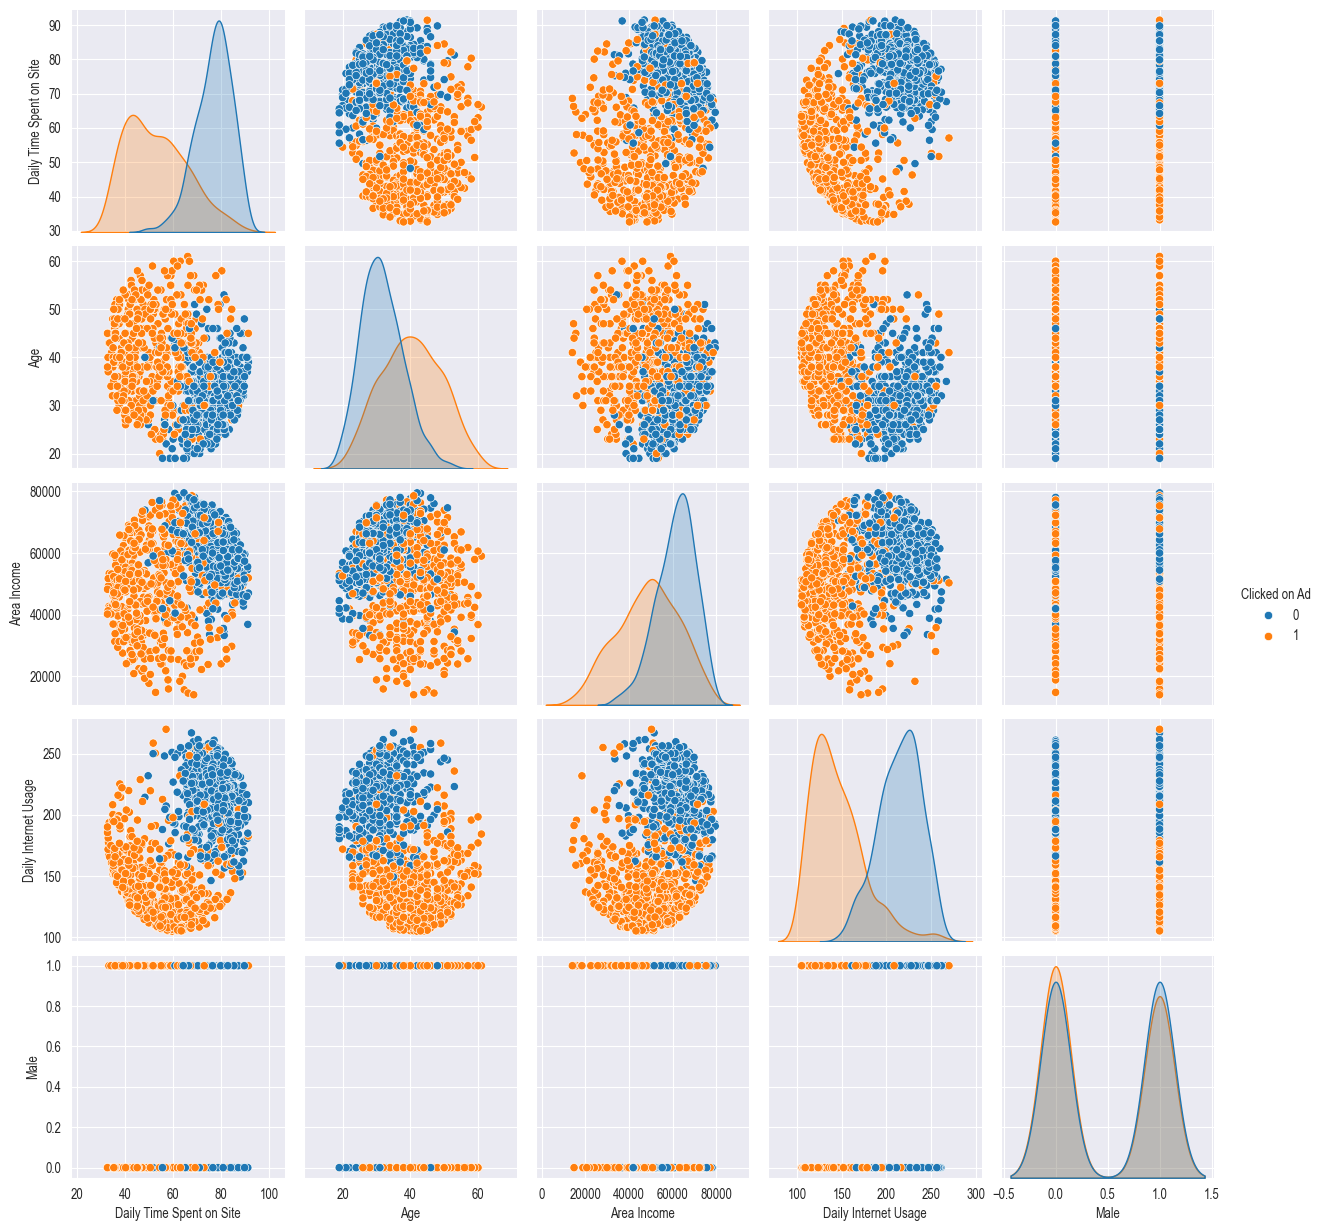

In [71]:
# Finally , create a pairplot with the hue defined by the Clicked on Ad column feature

sns.pairplot(data=ad_data, hue='Clicked on Ad')

In [73]:
# Logistic Regression
# I have the freedom to choose the columns for training the model
# Split the data into training set and testing set using train_test_split

from sklearn.model_selection import train_test_split

X = ad_data[['Daily Internet Usage', 'Age']]
y = ad_data['Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
# Train and fit logistic regression model on the training set

# train

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [76]:
# fit

lr.fit(X_train, y_train)

LogisticRegression()

In [77]:
# Now , predict values for the testing data

predictions = lr.predict(X_test)

In [80]:
# Create a classification report for the model
from sklearn.metrics import classification_report

class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       160
           1       0.45      0.36      0.40       140

    accuracy                           0.49       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.49      0.49      0.49       300


In [81]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[97, 63],
       [89, 51]], dtype=int64)